In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [45]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
# # test = pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
# test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [0]:
file_path ='drive/My Drive/data/dataset_26_april_3.csv'
test = pd.read_csv(file_path)

In [47]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [0]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [49]:
print(test_new.shape) #ROWS, COLUMNS

(25000, 4223)


In [0]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [0]:
univariate_column_label=['DEWIHOBT9_I0','AEDAHO_T9_V2','AEWIHO_T9AV2']

In [92]:
size_column = len(univariate_column_label)
print(size_column)

3


In [93]:
univariate_data=test_new.iloc[2000:7000][univariate_column_label]
univariate_data=univariate_data.loc[::-1]
print(univariate_data.head())

                     DEWIHOBT9_I0  AEDAHO_T9_V2  AEWIHO_T9AV2
dateTime                                                     
2019-04-05 22:21:00         100.0     72.427071     76.598087
2019-04-05 22:22:00         100.0     71.620643     76.358689
2019-04-05 22:23:00         100.0     70.606738     77.241097
2019-04-05 22:24:00         100.0     70.531626     77.062413
2019-04-05 22:25:00         100.0     70.692115     76.297974


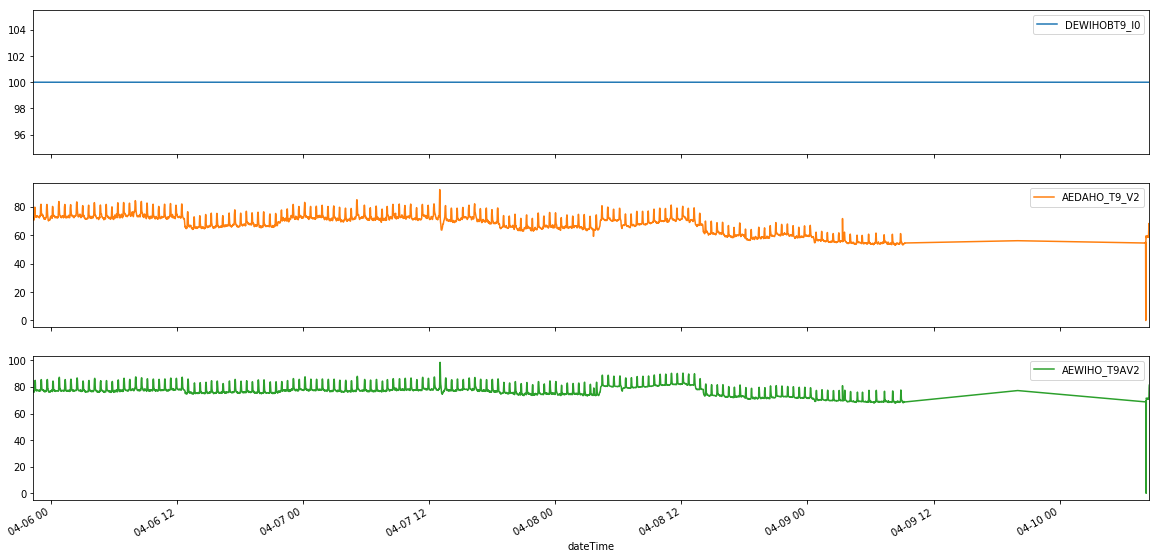

In [94]:
ax = univariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
# plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [95]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in univariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  0


In [0]:
if zero_index.size > 0:
    univariate_data_modify = univariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    univariate_data_modify = univariate_data

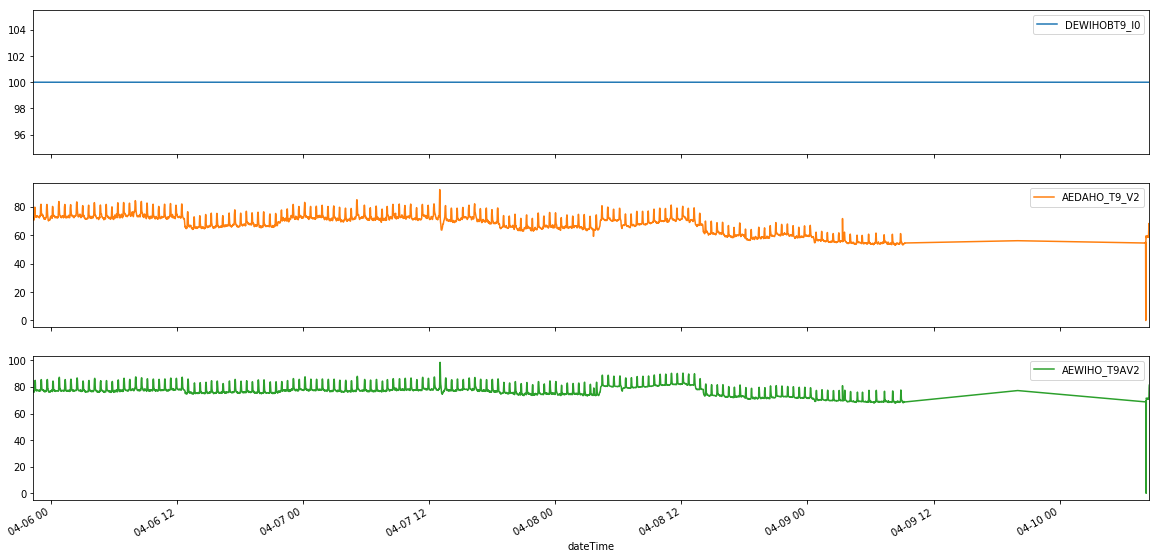

In [97]:
bx = univariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [0]:
univariate_data_1= univariate_data_modify.drop(['DEWIHOBT9_I0','AEWIHO_T9AV2'], axis=1)
univariate_data_2= univariate_data_modify.drop(['DEWIHOBT9_I0','AEDAHO_T9_V2'], axis=1)

In [0]:
from numpy import nan
univariate_data_drop_zero_1 = univariate_data_1.replace(0,nan)
univariate_data_drop_zero_1 = univariate_data_drop_zero_1.dropna(how='any',axis=0)

univariate_data_drop_zero_2 = univariate_data_2.replace(0,nan)
univariate_data_drop_zero_2 = univariate_data_drop_zero_2.dropna(how='any',axis=0)

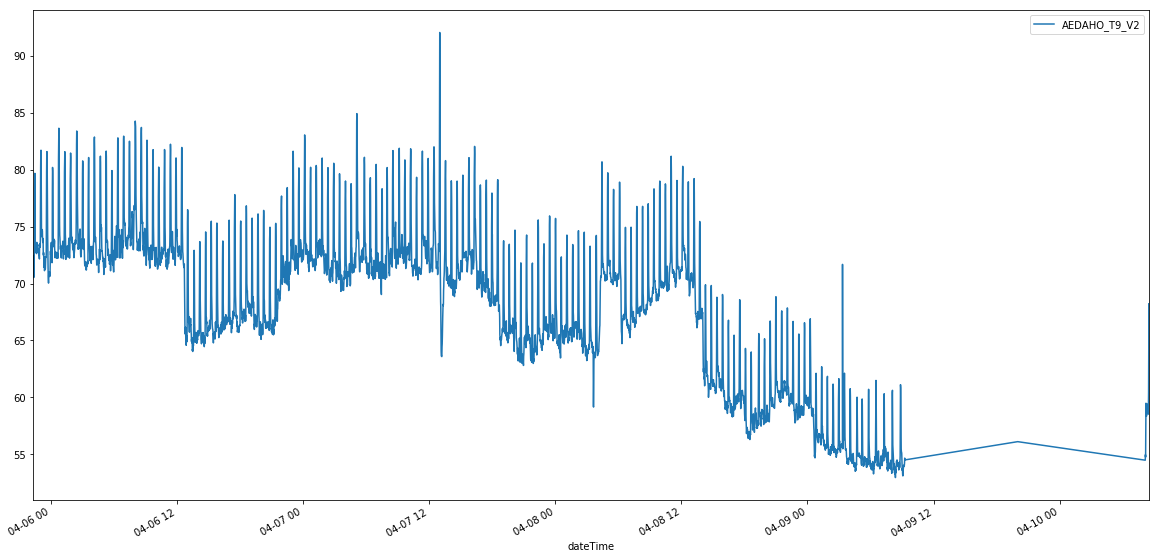

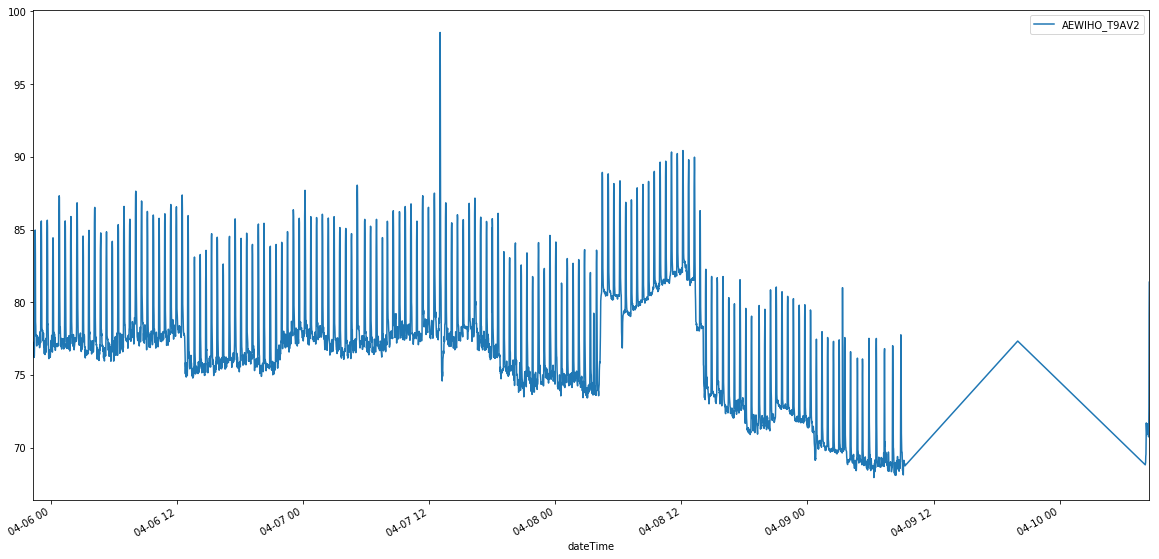

In [100]:
cx = univariate_data_drop_zero_1.plot()
dx = univariate_data_drop_zero_2.plot()
# plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [0]:
from fbprophet import Prophet

In [0]:
univariate_data_2['AEWIHO_T9AV2_orig'] = univariate_data_2['AEWIHO_T9AV2']

In [103]:
univariate_data_2['AEWIHO_T9AV2'] = np.log(univariate_data_2['AEWIHO_T9AV2'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



In [104]:
univariate_data_2.head()

,AEWIHO_T9AV2,AEWIHO_T9AV2_orig
dateTime,,
2019-04-05 22:21:00,4.338572,76.598087
2019-04-05 22:22:00,4.335442,76.358689
2019-04-05 22:23:00,4.346932,77.241097
2019-04-05 22:24:00,4.344616,77.062413
2019-04-05 22:25:00,4.334646,76.297974


In [0]:
univariate_data_2['ds'] = univariate_data_2.index

In [0]:
univariate_data_2 = univariate_data_2.rename(index=str, columns={"AEWIHO_T9AV2": "y", "AEWIHO_T9AV2_orig": "y_orig"})

In [107]:
univariate_data_2.head()

,y,y_orig,ds
dateTime,,,
2019-04-05 22:21:00,4.338572,76.598087,2019-04-05 22:21:00
2019-04-05 22:22:00,4.335442,76.358689,2019-04-05 22:22:00
2019-04-05 22:23:00,4.346932,77.241097,2019-04-05 22:23:00
2019-04-05 22:24:00,4.344616,77.062413,2019-04-05 22:24:00
2019-04-05 22:25:00,4.334646,76.297974,2019-04-05 22:25:00


In [108]:
cols = univariate_data_2.columns.tolist()
print(cols)

['y', 'y_orig', 'ds']


In [109]:
cols = cols[-1:] + cols[:-1]
print(cols)

['ds', 'y', 'y_orig']


In [0]:
univariate_data_2 = univariate_data_2[cols]

In [111]:
univariate_data_2.head()

,ds,y,y_orig
dateTime,,,
2019-04-05 22:21:00,2019-04-05 22:21:00,4.338572,76.598087
2019-04-05 22:22:00,2019-04-05 22:22:00,4.335442,76.358689
2019-04-05 22:23:00,2019-04-05 22:23:00,4.346932,77.241097
2019-04-05 22:24:00,2019-04-05 22:24:00,4.344616,77.062413
2019-04-05 22:25:00,2019-04-05 22:25:00,4.334646,76.297974


In [112]:
univariate_data_2.tail()

,ds,y,y_orig
dateTime,,,
2019-04-10 08:27:00,2019-04-10 08:27:00,4.259139,70.749025
2019-04-10 08:28:00,2019-04-10 08:28:00,4.267499,71.342960
2019-04-10 08:29:00,2019-04-10 08:29:00,4.288568,72.862086
2019-04-10 08:30:00,2019-04-10 08:30:00,4.371949,79.197810
2019-04-10 08:31:00,2019-04-10 08:31:00,4.399158,81.382283


In [113]:
print (univariate_data_2[np.isinf(univariate_data_2['y'])])

                                     ds    y  y_orig
dateTime                                            
2019-04-10 08:13:00 2019-04-10 08:13:00 -inf     0.0


In [0]:
univariate_data_2 = univariate_data_2.replace([np.inf, -np.inf], np.nan)

In [0]:
from numpy import nan
univariate_data_2 = univariate_data_2.replace(0,nan)
univariate_data_2 = univariate_data_2.dropna(how='any',axis=0)

In [116]:
print (univariate_data_2[np.isinf(univariate_data_2['y'])])

Empty DataFrame
Columns: [ds, y, y_orig]
Index: []


In [117]:
model = Prophet() #instantiate Prophet
model.fit(univariate_data_2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [0]:
# future_data = model.make_future_dataframe(periods=20, freq = 'm')
future_data = model.make_future_dataframe(periods=5)

In [130]:
print(type(future_data))

<class 'pandas.core.frame.DataFrame'>


In [0]:
# print(future_data)

In [0]:
forecast_data = model.predict(future_data)

In [133]:
print(type(forecast_data))

<class 'pandas.core.frame.DataFrame'>


In [134]:
forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-04-05 22:21:00,4.334295,4.316745,4.400571,4.334295,4.334295,0.023383,0.023383,0.023383,0.023383,0.023383,0.023383,0.0,0.0,0.0,4.357678
1,2019-04-05 22:22:00,4.334443,4.317706,4.400467,4.334443,4.334443,0.023415,0.023415,0.023415,0.023415,0.023415,0.023415,0.0,0.0,0.0,4.357858
2,2019-04-05 22:23:00,4.334591,4.317264,4.398389,4.334591,4.334591,0.023446,0.023446,0.023446,0.023446,0.023446,0.023446,0.0,0.0,0.0,4.358037
3,2019-04-05 22:24:00,4.334739,4.314572,4.400123,4.334739,4.334739,0.023476,0.023476,0.023476,0.023476,0.023476,0.023476,0.0,0.0,0.0,4.358215
4,2019-04-05 22:25:00,4.334887,4.310861,4.397610,4.334887,4.334887,0.023505,0.023505,0.023505,0.023505,0.023505,0.023505,0.0,0.0,0.0,4.358392


In [135]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4999,2019-04-11 08:31:00,4.278979,3.889525,4.686602
5000,2019-04-12 08:31:00,4.296989,3.160451,5.448343
5001,2019-04-13 08:31:00,4.314998,2.127341,6.340527
5002,2019-04-14 08:31:00,4.333008,0.877264,7.611728
5003,2019-04-15 08:31:00,4.351017,-0.452099,8.984104


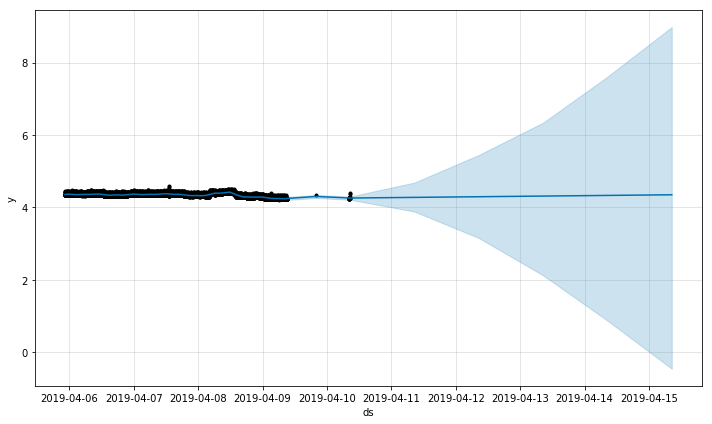

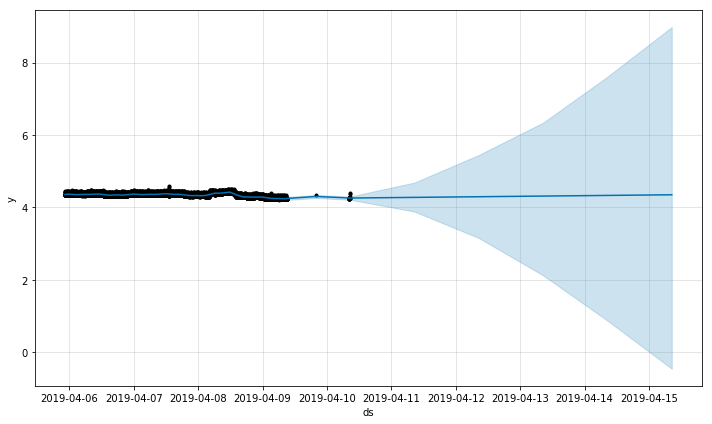

In [136]:
model.plot(forecast_data)

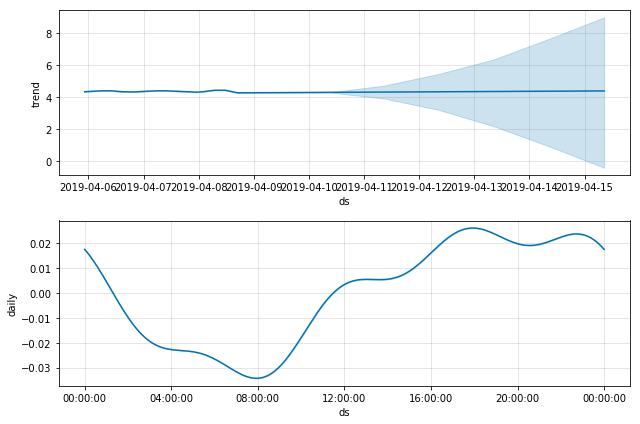

In [137]:
model.plot_components(forecast_data)
plt.savefig('forecast_data.png')

In [0]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

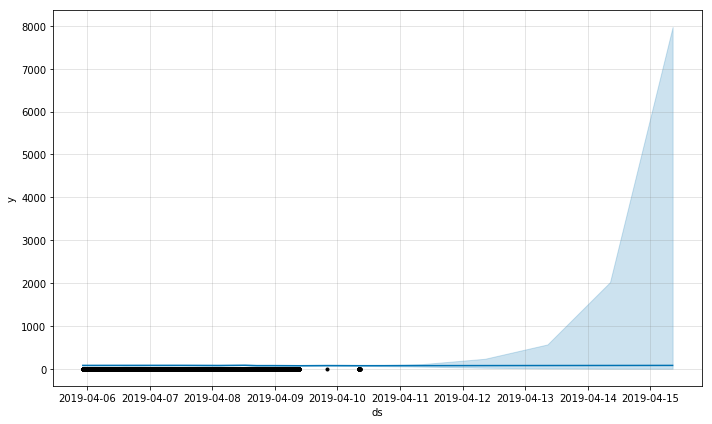

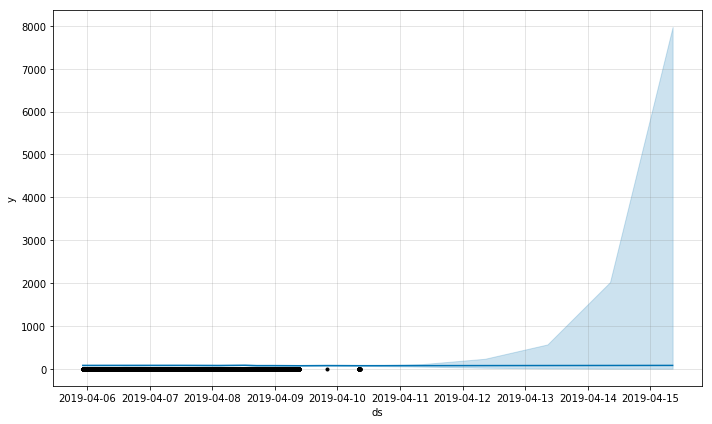

In [139]:
model.plot(forecast_data_orig)